In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customers-churn/Churn Modeling.csv


Dataset Shape: (10000, 14)

Columns:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

First 5 Rows:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1   

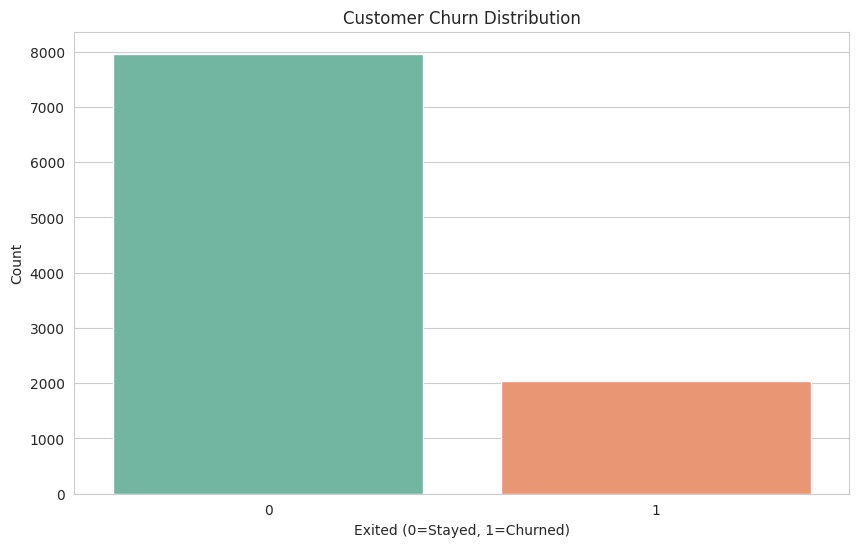

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

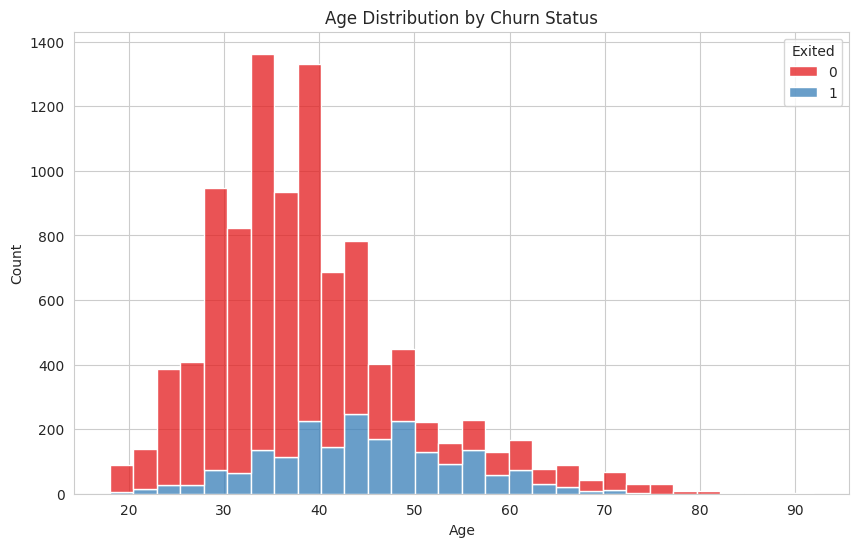

/tmp/ipykernel_48/3336468934.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_churn = df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()



Churn Rate by Gender:
 Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559


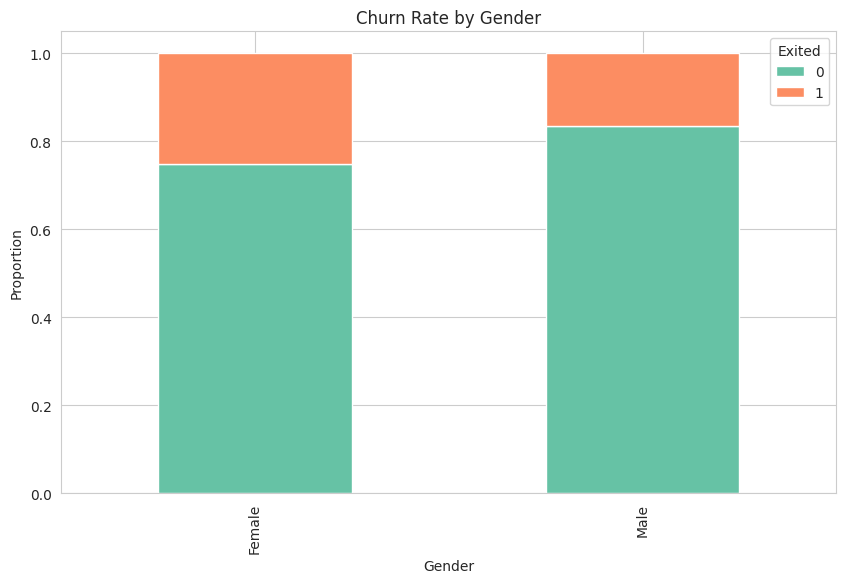


Churn Rate by Geography:
 Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675568  0.324432
Spain      0.833266  0.166734


/tmp/ipykernel_48/3336468934.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  geo_churn = df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()


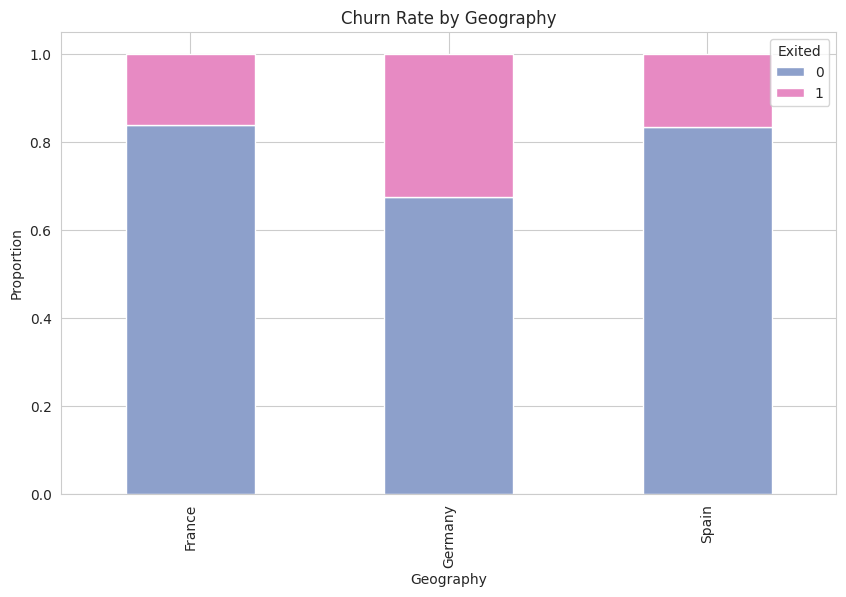


Average Financial Metrics by Churn:
                        Stayed        Churned
CreditScore        651.853196     645.351497
Balance          72745.296779   91108.539337
EstimatedSalary  99738.391772  101465.677531
NumOfProducts        1.544267       1.475209
Tenure               5.033279       4.932744


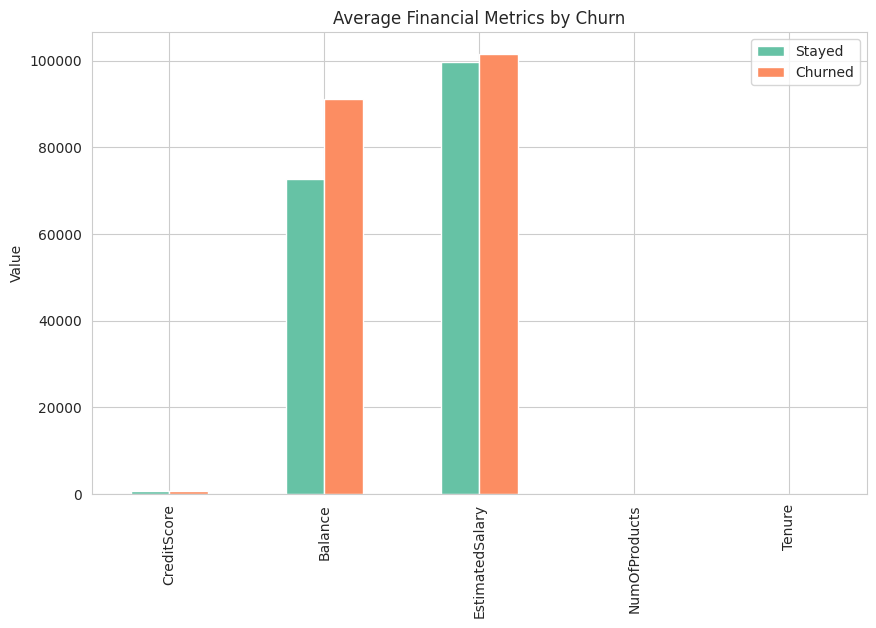

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Load Dataset
file_path = '/kaggle/input/bank-customers-churn/Churn Modeling.csv'
df = pd.read_csv(file_path)
#Quick Data Overview
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Convert categorical columns if needed
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for col in categorical_cols:
    df[col] = df[col].astype('category')


# Basic Churn Distribution
churn_counts = df['Exited'].value_counts()
print("\nChurn Distribution:\n", churn_counts)

sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0=Stayed, 1=Churned)')
plt.ylabel('Count')
plt.show()

# Demographics Analysis: Age, Gender, Geography

## Age distribution
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30, palette='Set1')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender vs Churn
gender_churn = df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Gender:\n", gender_churn)

gender_churn.plot(kind='bar', stacked=True, color=['#66c2a5','#fc8d62'])
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.show()

## Geography vs Churn
geo_churn = df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Geography:\n", geo_churn)

geo_churn.plot(kind='bar', stacked=True, color=['#8da0cb','#e78ac3'])
plt.title('Churn Rate by Geography')
plt.ylabel('Proportion')
plt.show()

# Summary Table: Mean Financial Metrics by Churn
financial_cols = ['CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Tenure']
summary = df.groupby('Exited')[financial_cols].mean().T
summary.columns = ['Stayed', 'Churned']
print("\nAverage Financial Metrics by Churn:\n", summary)

# Visualize
summary.plot(kind='bar', color=['#66c2a5','#fc8d62'])
plt.title('Average Financial Metrics by Churn')
plt.ylabel('Value')
plt.show()